# **Storing datasets in drive, to load**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/oko #REPLACE WITH YOUR FILEPATH, 'oko' is where mine was

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/oko


# **Load stuff**

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import scipy as sp
from scipy.stats import norm
from scipy.stats import ttest_ind

# **Assignment 1a**

Use missing_data.csv and perform data pre-processing

In [32]:
%cd q1a #filepath

/content/drive/MyDrive/oko/q1a


In [33]:
misVal = pd.read_csv("missing_data.csv")
print(misVal)

     ID   V1   V2   V3   V4   V5   V6   V7    V8   V9  V10  V11  V12  V13  V14
0   201  3.3  0.9  8.6  4.0  2.1  1.8  6.3  41.0  4.5  0.0  1.0  0.0  0.0  2.0
1   202  0.0  0.4  NaN  2.5  1.2  1.7  5.2  35.0  3.3  0.0  1.0  0.0  0.0  1.0
2   203  3.0  NaN  9.1  7.1  3.5  3.4  NaN  55.0  5.2  0.0  1.0  1.0  0.0  3.0
3   204  0.0  1.5  NaN  4.8  1.9  2.5  7.2  36.0  NaN  1.0  0.0  1.0  0.0  1.0
4   205  5.1  1.4  NaN  4.8  3.3  2.6  3.8  49.0  4.9  0.0  1.0  0.0  0.0  2.0
..  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...
65  266  4.2  2.4  9.4  4.9  3.2  2.7  8.5  49.0  5.2  0.0  1.0  0.0  1.0  2.0
66  267  3.8  0.8  NaN  NaN  2.2  2.6  5.3  42.0  5.1  0.0  1.0  0.0  0.0  2.0
67  268  3.3  2.6  9.7  3.3  2.9  1.5  5.2  47.0  NaN  0.0  1.0  0.0  1.0  3.0
68  269  NaN  1.9  NaN  4.5  1.5  3.1  9.9  39.0  3.3  1.0  0.0  1.0  1.0  1.0
69  270  4.5  1.6  8.7  4.6  3.1  2.1  6.8  56.0  5.1  0.0  1.0  0.0  0.0  3.0

[70 rows x 15 columns]


## **a. Identify rows and columns we can remove**

In [34]:
# 1. Calculate the percentage of missing data for each column
missing_percent_col = misVal.isnull().mean() * 100

# Identify columns to remove (more than 20% missing), 20percent chosen as
cols_to_remove = missing_percent_col[missing_percent_col > 20].index

# Drop columns with more than 20% missing data
data_cleaned = misVal.drop(columns=cols_to_remove)

# 2. Calculate the percentage of missing data for each row
missing_percent_row = data_cleaned.isnull().mean(axis=1) * 100

# Identify rows to remove (more than 30% missing)
rows_to_remove = data_cleaned.index[missing_percent_row > 30]

# Drop rows with more than 30% missing data
data_cleaned = data_cleaned.drop(rows_to_remove)

data_cleaned.to_csv('clean_data.csv', index=False)
print(data_cleaned)

     ID   V2   V4   V5   V6   V7    V8   V9  V10  V11  V12  V13  V14
0   201  0.9  4.0  2.1  1.8  6.3  41.0  4.5  0.0  1.0  0.0  0.0  2.0
1   202  0.4  2.5  1.2  1.7  5.2  35.0  3.3  0.0  1.0  0.0  0.0  1.0
2   203  NaN  7.1  3.5  3.4  NaN  55.0  5.2  0.0  1.0  1.0  0.0  3.0
3   204  1.5  4.8  1.9  2.5  7.2  36.0  NaN  1.0  0.0  1.0  0.0  1.0
4   205  1.4  4.8  3.3  2.6  3.8  49.0  4.9  0.0  1.0  0.0  0.0  2.0
..  ...  ...  ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...
65  266  2.4  4.9  3.2  2.7  8.5  49.0  5.2  0.0  1.0  0.0  1.0  2.0
66  267  0.8  NaN  2.2  2.6  5.3  42.0  5.1  0.0  1.0  0.0  0.0  2.0
67  268  2.6  3.3  2.9  1.5  5.2  47.0  NaN  0.0  1.0  0.0  1.0  3.0
68  269  1.9  4.5  1.5  3.1  9.9  39.0  3.3  1.0  0.0  1.0  1.0  1.0
69  270  1.6  4.6  3.1  2.1  6.8  56.0  5.1  0.0  1.0  0.0  0.0  3.0

[64 rows x 13 columns]


## **b. Impute data – try  2 different methods**

In [41]:
# Imputation Method 1: Mean substitution for columns with less than 10% missing data, immputes most of them
cols_mean_impute = missing_percent_col[(missing_percent_col > 0) & (missing_percent_col <= 10)].index

# Fill missing values with mean for these columns without inplace=True
for col in cols_mean_impute:
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mean())

# Output the cleaned and imputed dataset
data_cleaned.to_csv('subImpute.csv', index=False)

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

def regression_imputation(df, col):
    # Separate the dataset into training (no missing data) and test (with missing data)
    train_data = df[df[col].notnull()]
    test_data = df[df[col].isnull()]

    # If no missing values in this column, skip imputation
    if test_data.empty:
        return

    # Features for regression (all other columns)
    X_train = train_data.drop(columns=[col])
    y_train = train_data[col]
    X_test = test_data.drop(columns=[col])

    # Ensure X_train and X_test are not empty
    if X_train.empty or X_test.empty:
        print(f"Skipping regression imputation for {col} as train or test data is empty.")
        return

    # Impute missing values in features before using them for regression
    imputer = SimpleImputer(strategy="mean")
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Perform regression to predict missing values
    reg = LinearRegression()
    reg.fit(X_train_imputed, y_train)

    # Predict missing values
    predicted_values = reg.predict(X_test_imputed)

    # Assign the predicted values to the missing rows in a way that avoids chained assignment
    df.loc[df[col].isnull(), col] = predicted_values

# Apply regression imputation for selected columns
cols_regression_impute = missing_percent_col[(missing_percent_col > 10) & (missing_percent_col <= 20)].index
for col in cols_regression_impute:
    regression_imputation(data_cleaned, col)



# Output the cleaned and imputed dataset
data_cleaned.to_csv('LinRegImpute.csv', index=False)

# ***Assignment 1b***

In [42]:
%cd ..
%cd q1b #filepath

/content/drive/MyDrive/oko
/content/drive/MyDrive/oko/q1b


In [43]:
# Load data into a DataFrame
data = pd.read_csv('blood_sample.csv')

## **1. Check the validity of the data. Determine whether it contains observations that do not make sense. Flag of the observations. Assume that there are no extreme values in this data. Possibility of human error while data entry is high. Use other observations to correct the data.**

In [44]:
import pandas as pd

# Define file paths

flagged_output_file = 'flagged_rows.csv'
fixed_output_file = 'fixed_values.csv'

# Read CSV file
df = data

# Define function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Define conditions for flagging erroneous values
def flag_errors(row):
    errors = []

    # Check age
    if row['AGE'] < 65 or row['AGE'] > 89:
        errors.append('AGE')

    # Check sex
    if row['SEX'] not in [1, 2]:
        errors.append('SEX')

    # Check laboratory
    if row['Laboratory'] not in [1, 2, 3, 4, 5, 6]:
        errors.append('Laboratory')

    # Check age group
    if row['AGE_GROUP'] not in [1, 2, 3, 4, 5]:
        errors.append('AGE_GROUP')

    # Check continuous variables for non-numeric or erroneous values using IQR
    continuous_vars = ['ALKA_PHOS', 'Cal', 'I_PHOS', 'CA_MMOL', 'PHOS_MMOL']
    for var in continuous_vars:
        if pd.isna(row[var]) or detect_outliers_iqr(df, var)[row.name]:
            errors.append(var)

    return ', '.join(errors) if errors else None

# Apply the flagging function to each row and store the result in a new column 'errors'
df['errors'] = df.apply(flag_errors, axis=1)

# Filter rows with errors
flagged_df = df[df['errors'].notna()]

# Store the flagged rows in a separate CSV file
flagged_df.to_csv(flagged_output_file, index=False)

print(f'Flagged rows have been saved to {flagged_output_file}')

# Function to fix erroneous values
def fix_values(df, row):
    fixed_row = row.copy()

    # Fix AGE
    if 'AGE' in row['errors']:
        fixed_row['AGE'] = df['AGE'].median()  # Replace with the median age

    # Fix SEX
    if 'SEX' in row['errors']:
        fixed_row['SEX'] = df['SEX'].mode()[0]  # Replace with the most frequent (mode) sex

    # Fix Laboratory
    if 'Laboratory' in row['errors']:
        fixed_row['Laboratory'] = df['Laboratory'].mode()[0]  # Replace with the most frequent lab

    # Fix AGE_GROUP
    if 'AGE_GROUP' in row['errors']:
        fixed_row['AGE_GROUP'] = df['AGE_GROUP'].mode()[0]  # Replace with the most frequent age group

    # Fix continuous variables using the median of non-outlier values
    continuous_vars = ['ALKA_PHOS', 'Cal', 'I_PHOS', 'CA_MMOL', 'PHOS_MMOL']
    for var in continuous_vars:
        if var in row['errors']:
            fixed_row[var] = df[~detect_outliers_iqr(df, var)][var].median()

    return fixed_row

# Apply the fix_values function to each flagged row
fixed_df = flagged_df.apply(lambda row: fix_values(df, row), axis=1)

# Write the fixed values to a new CSV file
fixed_df.to_csv(fixed_output_file, index=False)

print(f'Fixed values have been saved to {fixed_output_file}')


Flagged rows have been saved to flagged_rows.csv
Fixed values have been saved to fixed_values.csv


In [45]:
import pandas as pd

# Define file paths
blood_sample_file = 'blood_sample.csv'
fixed_values_file = 'fixed_values.csv'
output_file = 'updated_blood_samples.csv'  # Output file path

# Read the blood sample data
df_blood_sample = pd.read_csv(blood_sample_file)

# Read the fixed values data
df_fixed_values = pd.read_csv(fixed_values_file)

# Clean column names by stripping whitespace
df_blood_sample.columns = df_blood_sample.columns.str.strip()
df_fixed_values.columns = df_fixed_values.columns.str.strip()

# Check the structure of the DataFrames
print("Blood Sample Data:")
print(df_blood_sample.head())
print("\nFixed Values Data:")
print(df_fixed_values.head())

# Ensure the "Subject No." is used as a unique identifier
key_column = 'Subject No.'

# Merge the original data and fixed data on the key column
df_updated = df_blood_sample.merge(df_fixed_values, on=key_column, how='left', suffixes=('', '_fixed'))

# Print the columns of the merged DataFrame to debug
print("\nColumns in the merged DataFrame:")
print(df_updated.columns)

# Update the original DataFrame with fixed values where available
for col in df_fixed_values.columns:
    if col != key_column:  # Skip the key column
        # Check if the fixed column exists
        fixed_col_name = f'{col}_fixed'
        if fixed_col_name in df_updated.columns:
            df_updated[col] = df_updated[fixed_col_name].combine_first(df_updated[col])
        else:
            print(f"Warning: {fixed_col_name} does not exist in the merged DataFrame.")

# Drop the fixed columns after merging
fixed_columns_to_drop = [f'{col}_fixed' for col in df_fixed_values.columns if col != key_column]
df_updated.drop(columns=fixed_columns_to_drop, inplace=True, errors='ignore')

# Sort the DataFrame by the "Subject No." column
df_updated.sort_values(by=key_column, inplace=True)

# Save the updated blood samples data to a new CSV file
df_updated.to_csv(output_file, index=False)

print(f'Updated blood sample dataset has been saved to {output_file}')


Blood Sample Data:
   Subject No.  AGE  SEX  ALKA_PHOS  Cal  I_PHOS  Laboratory  CA_MMOL  \
0            9   89  1.0         86  9.0     2.0           4     2.25   
1          115   79  1.0         77  9.0     3.8           1     2.25   
2           19   70  2.0         67  9.5     3.5           5     2.38   
3           27   71  2.0        109  8.9    29.0           3     2.23   
4           15   70  2.0         91  9.5     4.4           2     2.38   

   PHOS_MMOL  AGE_GROUP  
0       0.65          5  
1       1.23          3  
2       1.13          2  
3       0.94          2  
4       1.42          2  

Fixed Values Data:
   Subject No.   AGE  SEX  ALKA_PHOS   Cal  I_PHOS  Laboratory  CA_MMOL  \
0           27  71.0  2.0      109.0   8.9     3.5           3     2.23   
1           37  68.0  1.0       60.0   9.3     3.5           3     2.33   
2           25  76.0  2.0      100.0  10.1     3.5           3     2.53   
3           53  72.0  2.0      147.0   9.8     3.7           2    

## **2. Data also contains duplicate values**

In [46]:
import pandas as pd

# Define the input and output file paths
input_file = 'updated_blood_samples.csv'
output_file = 'final_blood_samples_no_duplicates.csv'  # New file to save the results

# Read the updated blood samples data
df_updated = pd.read_csv(input_file)

# Remove duplicate rows based on all columns
df_unique = df_updated.drop_duplicates()

# Sort the DataFrame by "Subject No." column if needed
df_unique.sort_values(by='Subject No.', inplace=True)

# Save the DataFrame with duplicates removed to a new CSV file
df_unique.to_csv(output_file, index=False)

print(f'Final blood sample dataset without duplicates has been saved to {output_file}')



Final blood sample dataset without duplicates has been saved to final_blood_samples_no_duplicates.csv


<ipython-input-46-7aefb6f5562a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique.sort_values(by='Subject No.', inplace=True)


In [47]:
import pandas as pd

# Define the input and output file paths
input_file = 'updated_blood_samples.csv'
output_file = 'final_blood_samples_no_duplicates_except_subject.csv'  # New file to save the results

# Read the updated blood samples data
df_updated = pd.read_csv(input_file)

# Remove duplicates based on all columns except "Subject No."
df_unique = df_updated.drop_duplicates(subset=df_updated.columns.difference(['Subject No.']))

# Sort the DataFrame by "Subject No." if needed
df_unique.sort_values(by='Subject No.', inplace=True)

# Save the DataFrame with duplicates removed to a new CSV file
df_unique.to_csv(output_file, index=False)

print(f'Final blood sample dataset without duplicates (except for Subject No.) has been saved to {output_file}')


Final blood sample dataset without duplicates (except for Subject No.) has been saved to final_blood_samples_no_duplicates_except_subject.csv


<ipython-input-47-0b71004f4fb3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique.sort_values(by='Subject No.', inplace=True)


In [48]:
import pandas as pd

# Define the input file paths
first_no_dupes_file = 'final_blood_samples_no_duplicates.csv'  # First dataset (original no duplicates)
second_no_dupes_file = 'final_blood_samples_no_duplicates_except_subject.csv'  # Second dataset

# Read the two datasets
df_first_no_dupes = pd.read_csv(first_no_dupes_file)
df_second_no_dupes = pd.read_csv(second_no_dupes_file)

# Comparing the two DataFrames based on all columns except "Subject No."
# Using merge with indicator to find entries in the first DataFrame that are not in the second
merged_df = df_first_no_dupes.merge(
    df_second_no_dupes,
    how='outer',
    indicator=True
)

# Filter for rows that are only in the first dataset
not_in_second = merged_df[merged_df['_merge'] == 'left_only'].drop(columns=['_merge'])

# Save the missing entries to a new CSV file
missing_entries_file = 'missing_entries.csv'
not_in_second.to_csv(missing_entries_file, index=False)

print(f'Missing entries that are in the first no duplicates but not in the second have been saved to {missing_entries_file}')


Missing entries that are in the first no duplicates but not in the second have been saved to missing_entries.csv


## **3. Perform a summary analysis of the continuous variables on clean dataset. Report the mean, median, standard deviation, min and max. summarize the discrete variables also**

In [49]:
import pandas as pd

# Define the file path for the cleaned dataset without duplicates
cleaned_dataset_file = 'final_blood_samples_no_duplicates.csv'

# Read the cleaned dataset
df_cleaned = pd.read_csv(cleaned_dataset_file)

# Continuous variables
continuous_vars = ['AGE', 'ALKA_PHOS', 'Cal', 'I_PHOS', 'CA_MMOL', 'PHOS_MMOL']

# Summary statistics for continuous variables
summary_continuous = df_cleaned[continuous_vars].describe().T[['mean', '50%', 'std', 'min', 'max']]
summary_continuous.columns = ['Mean', 'Median', 'Standard Deviation', 'Min', 'Max']

# Print summary statistics for continuous variables
print("Summary Statistics for Continuous Variables:")
print(summary_continuous)

# Discrete variables
discrete_vars = ['SEX', 'Laboratory', 'AGE_GROUP']

# Summary for discrete variables
summary_discrete = df_cleaned[discrete_vars].describe(include='all')

# Print summary statistics for discrete variables
print("\nSummary Statistics for Discrete Variables:")
print(summary_discrete)


Summary Statistics for Continuous Variables:
                Mean  Median  Standard Deviation    Min     Max
AGE        72.359551   72.00            4.792289  65.00   89.00
ALKA_PHOS  88.898876   85.00           24.471612  42.00  159.00
Cal         9.421348    9.40            0.525394   8.00   11.00
I_PHOS      3.452528    3.50            0.506575   2.00    5.00
CA_MMOL     2.359382    2.35            0.129175   2.00    2.75
PHOS_MMOL   1.107921    1.13            0.168653   0.65    1.61

Summary Statistics for Discrete Variables:
              SEX  Laboratory   AGE_GROUP
count  178.000000  178.000000  178.000000
mean     1.477528    2.073034    2.073034
std      0.500904    1.442006    0.962725
min      1.000000    1.000000    1.000000
25%      1.000000    1.000000    1.000000
50%      1.000000    1.000000    2.000000
75%      2.000000    3.000000    3.000000
max      2.000000    6.000000    5.000000


## **4. Construct side by side box plots on the six continuous variables with the factor variable as sex. Then construct side by side box plots of the six continuous variables with the factor variable as laboratory.**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

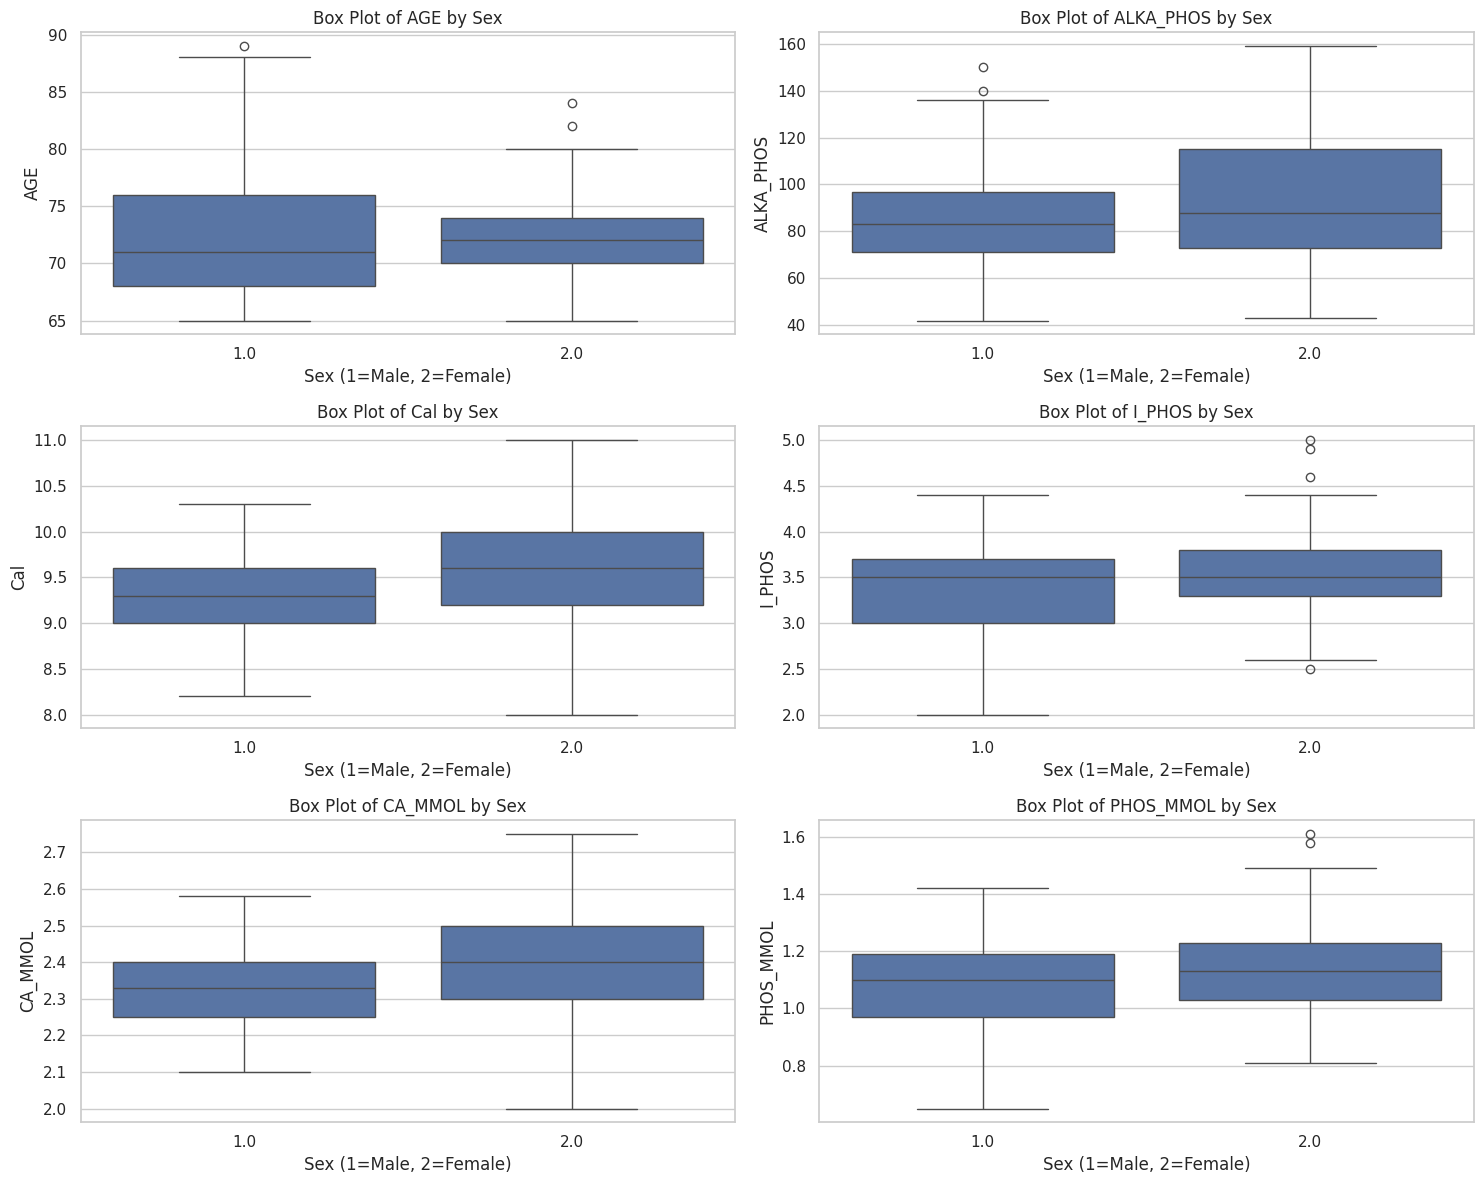

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

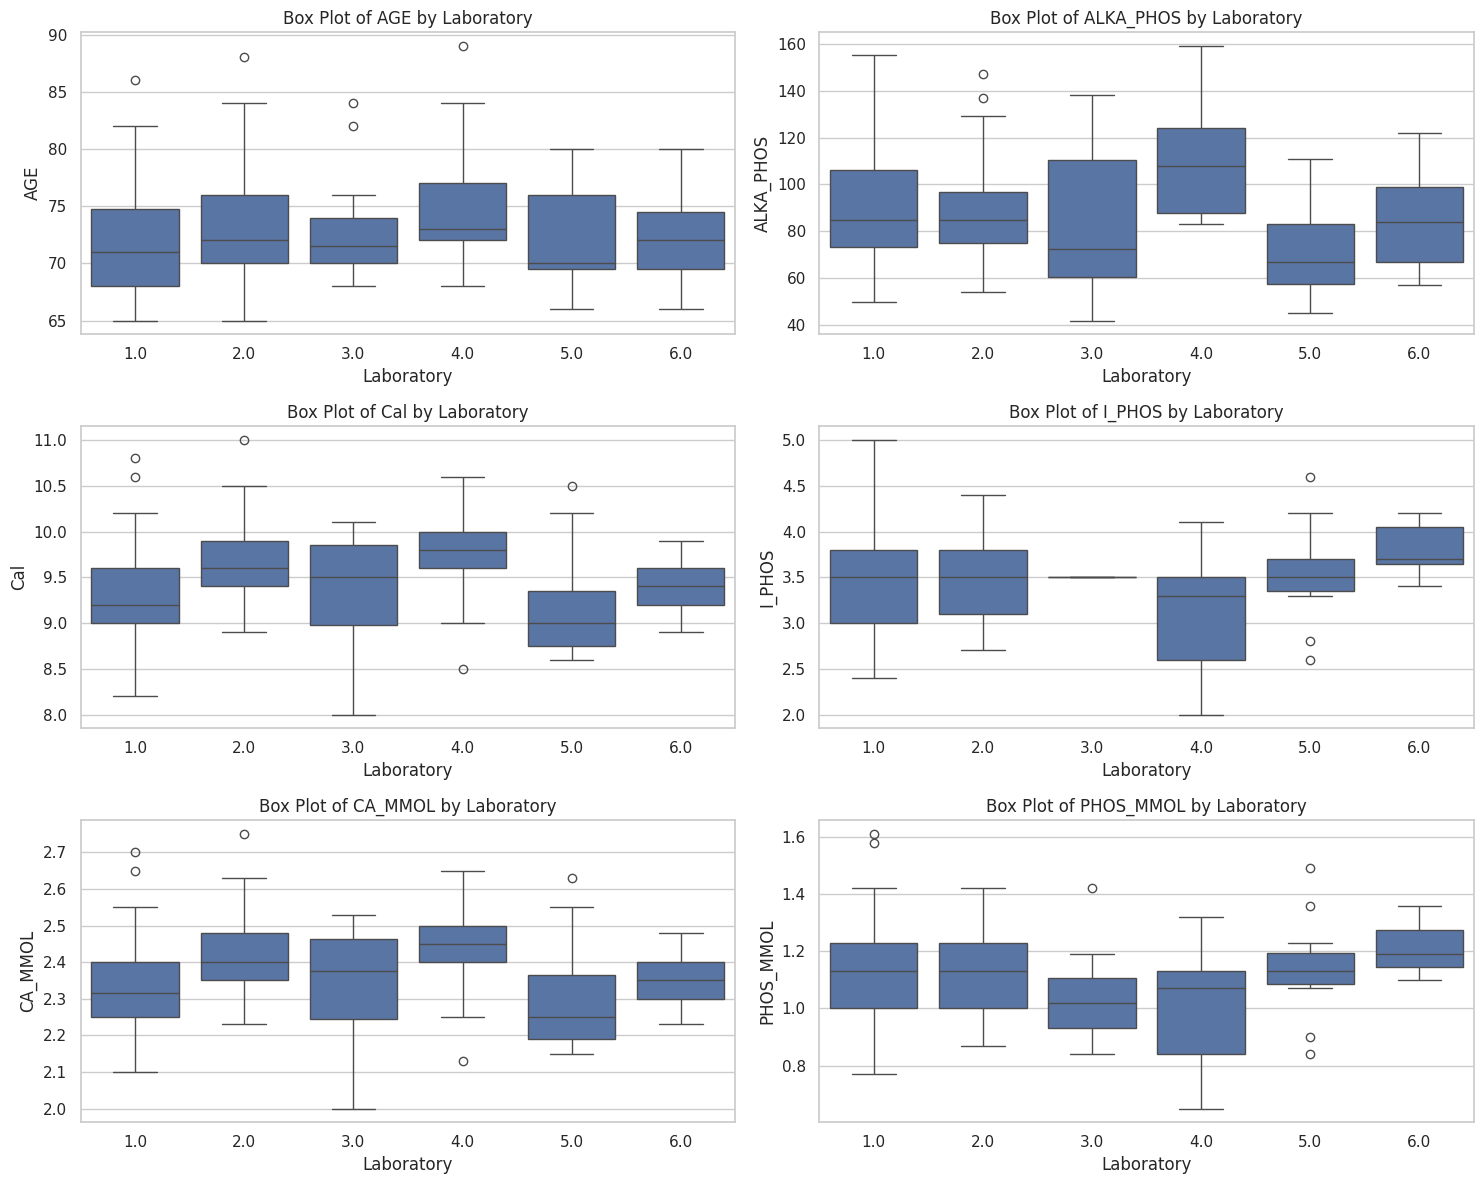

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Defined the file path for the cleaned dataset without duplicates
cleaned_dataset_file = 'final_blood_samples_no_duplicates.csv'

# Read the cleaned dataset
df_cleaned = pd.read_csv(cleaned_dataset_file)

# Defined the continuous variables
continuous_vars = ['AGE', 'ALKA_PHOS', 'Cal', 'I_PHOS', 'CA_MMOL', 'PHOS_MMOL']

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Created a figure for the box plots with Sex as a factor variable
plt.figure(figsize=(15, 12))

# Loop through each continuous variable for box plots against Sex
for i, var in enumerate(continuous_vars):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x='SEX', y=var, data=df_cleaned)
    plt.title(f'Box Plot of {var} by Sex')
    plt.xlabel('Sex (1=Male, 2=Female)')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

# Create a figure for the box plots with Laboratory as a factor variable
plt.figure(figsize=(15, 12))

# Loop through each continuous variable for box plots against Laboratory
for i, var in enumerate(continuous_vars):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x='Laboratory', y=var, data=df_cleaned)
    plt.title(f'Box Plot of {var} by Laboratory')
    plt.xlabel('Laboratory')
    plt.ylabel(var)

plt.tight_layout()
plt.show()


## **5. Summarize your findings. Plot the graphs and give inferences**

**Inferences:**
* Age: If one sex has a noticeably higher median age, it might indicate a demographic trend in the sample population.
* Alkaline Phosphatase Levels: If males have higher levels than females, this might be significant for health assessments, as alkaline phosphatase can indicate liver and bone diseases.
* Calcium and Phosphorus Levels: Disparities could indicate dietary differences or underlying health issues that may be more prevalent in one sex or across laboratories.
* Laboratory Variations: Consistent findings across laboratories are expected, but significant discrepancies might highlight the need for standardization or further investigation into measurement methods.

## **6. Is there any difference exists in levels for male and female?**

In [51]:
import pandas as pd
import scipy.stats as stats
import numpy as np

# Load the cleaned dataset
df_cleaned = pd.read_csv('final_blood_samples_no_duplicates.csv')

# Continuous variables
continuous_vars = ['AGE', 'ALKA_PHOS', 'Cal', 'I_PHOS', 'CA_MMOL', 'PHOS_MMOL']

# Store results
results = {}

for var in continuous_vars:
    # Separate data by sex
    male_data = df_cleaned[df_cleaned['SEX'] == 1][var]
    female_data = df_cleaned[df_cleaned['SEX'] == 2][var]

    # Check for normality using Shapiro-Wilk test
    stat_male, p_male = stats.shapiro(male_data)
    stat_female, p_female = stats.shapiro(female_data)

    # Determine the appropriate test based on normality
    if p_male > 0.05 and p_female > 0.05:  # If both groups are normally distributed
        t_stat, p_value = stats.ttest_ind(male_data, female_data)
        test_type = 'Independent Samples t-test'
    else:  # If either group is not normally distributed
        u_stat, p_value = stats.mannwhitneyu(male_data, female_data)
        test_type = 'Mann-Whitney U test'

    # Determine whether to reject or fail to reject the null hypothesis
    if p_value < 0.05:
        decision = 'Reject null hypothesis: Significant difference exists'
    else:
        decision = 'Fail to reject null hypothesis: No significant difference exists'

    # Store results
    results[var] = {
        'Test Type': test_type,
        'Test Statistic': (t_stat if test_type == 'Independent Samples t-test' else u_stat),
        'p-value': p_value,
        'Decision': decision
    }

# Create a DataFrame for results and display
results_df = pd.DataFrame(results).T
print(results_df)


                            Test Type Test Statistic   p-value  \
AGE               Mann-Whitney U test         3773.0   0.60128   
ALKA_PHOS         Mann-Whitney U test         3129.5  0.016579   
Cal        Independent Samples t-test      -3.818804  0.000186   
I_PHOS     Independent Samples t-test       -3.21729   0.00154   
CA_MMOL    Independent Samples t-test      -3.655777  0.000338   
PHOS_MMOL  Independent Samples t-test       -2.61965  0.009571   

                                                    Decision  
AGE        Fail to reject null hypothesis: No significant...  
ALKA_PHOS  Reject null hypothesis: Significant difference...  
Cal        Reject null hypothesis: Significant difference...  
I_PHOS     Reject null hypothesis: Significant difference...  
CA_MMOL    Reject null hypothesis: Significant difference...  
PHOS_MMOL  Reject null hypothesis: Significant difference...  
